**<h1><span style="color: BurlyWood;">Data-Driven Trend Detection for African Restaurants: Focus on Amala in the UK</span></h2>**

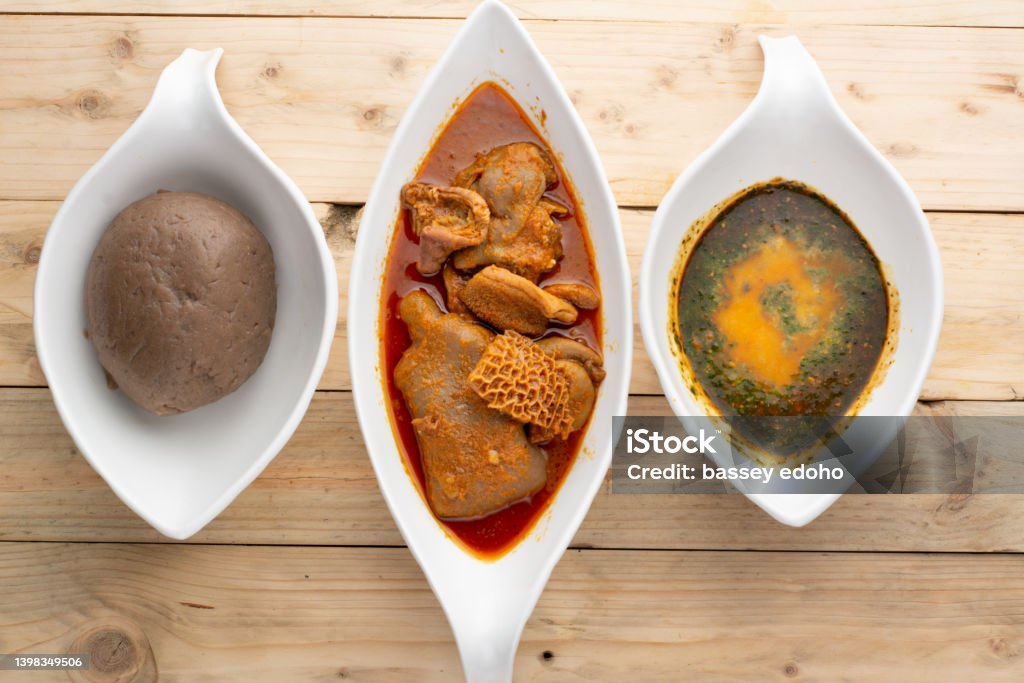

In [1]:
from IPython.display import Image,Markdown, display #importing the cover image
image_path = r"Amala-photo.jpg"
# Display the image
Image(filename=image_path,width=1500, height=800)

**<h2><span style="color: BurlyWood;">Table Of Content</span></h2>**
* 1.0 Introduction
* 2.0  Libraries & Configuration
  * 2.1 Libraries
  * 2.2 functions
  * 2.3 Configuration
* 3.0 Data Collection
  * 3.1 Data scraping
  * 3.2 Data exploration
* 4.0 Trediness Metrics
  * 4.1 Velocity
  * 4.2 Accelertion
  * 4.3 Volatility
  * 4.4 Trediness score
* 5.0 Business Recommendation

# 🍲 Data-Driven Trend Adoption for African Restaurants: A Case Study on Amala in the UK

This project explores how **Nigerian food trends—specifically *Amala***—are surfacing in the UK, using **Google Trends time-series analysis** to guide strategic decisions for small African food businesses. It supports a case study of *Amala Hut*, a Nigerian restaurant planning to expand into the UK, and addresses how to detect trends and recommend business adoption strategies.

---

## 🌍 Background

As African cuisine gains global popularity, small African-owned food businesses face key questions:

> *Which traditional meals are trending abroad? Should we expand our offering based on search and cultural demand data?*

This research draws inspiration from data-driven product strategies used in industries like tech and applies a similar method to **retail food trends**. Just like audio brands use reviews and consumer data to guide product launches, African restaurants can now do the same with **cuisine trends**.

---

## 🧩 Problem Statement

In the multicultural and competitive UK restaurant scene, identifying which **West African dishes are gaining popularity** is critical for small businesses. However, unstructured or anecdotal evidence makes it difficult to justify strategic decisions. This project seeks to answer:

> *Is Amala trending enough in the UK for a small African restaurant to adopt or expand its offering?*

---

## 🎯 Objectives

- Scrape and analyze UK-based Google search interest for Amala and other Nigerian dishes.
- Calculate **trend metrics**:
  - **Velocity** (growth rate)
  - **Acceleration** (momentum)
  - **Volatility** (stability)
- Create a **trendiness score** for each dish to support business decisions.
- Recommend whether *Amala Hut* should include Amala on their menu in the UK.

---

## 🧠 Methodology

- Time-series analysis of Google Trends data across multiple months
- Compute trend signals using:
  - `.diff()` for velocity
  - `.diff()` of velocity for acceleration
  - `rolling().std()` for volatility
- Normalize these scores and combine into a **composite trendiness score**
- Simulate business-level decision-making using **cost**, **local relevance**, and **trend strength**

---

## 🗃️ Data Sources

- **Google Trends** via the `pytrends` Python API
- Keywords: `"Amala"`, `"Pounded yam"`, `"Jollof rice"` (optional comparisons)
- Focus: UK region, last 12–24 months

---

## 📈 Business Recommendations:

Jollof Rice is the most trend-responsive dish and should be prioritized for adoption.  
Amala is stable and suitable for culturally aligned markets, while Pounded Yam may be deferred unless niche demand justifies it.




**<h1><span style="color: BurlyWood;">2.0 Libraries and Configuration</span></h2>**

Importing all relevant python libraries for the Exploratory data and analysis

## 2.1 Libraries
importing relevant libraries and declaring functions

In [5]:
!pip install pytrends

In [2]:
# @title
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from scipy import stats     # for statistics
from scipy.stats import kruskal # for statistics test
import seaborn as sns # for visualization
import os   # for operating system dependent functionality
import time     # for time-related functions
from datetime import datetime   # for date and time manipulation
from pytrends.request import TrendReq   # for Google Trends API
from pytrends.exceptions import TooManyRequestsError # for Google Trends API
from IPython.display import display, Markdown # for displaying markdown in Jupyter
from sklearn.preprocessing import MinMaxScaler # for scaling data
import warnings # filtering our warnings
#set seaborn theme
sns.set_theme(style="darkgrid", palette="colorblind")
#displaying all columns
pd.set_option('display.max_columns', None)
# Filter out warning output
warnings.filterwarnings('ignore')


## 2.2 Functions
defining functions to be used in the analysis.

In [6]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [7]:
# 📊 Function: Fetch and Save Google Trends Data
def fetch_google_trends_data(
    keyword: str,
    geo: str = 'GB',
    timeframe: str = 'today 5-y',
    save_dir: str = 'data'
):
    """
    Fetches interest-over-time data from Google Trends and saves it as a CSV file.

    Parameters:
        keyword (str): The keyword to track (e.g., 'Amala').
        geo (str): Country code for location of interest (default = 'GB' for United Kingdom).
        timeframe (str): Timeframe of trend data (default = 'today 5-y' for last 5 years).
        save_dir (str): Folder to save the resulting CSV (default = 'data').

    Returns:
        None
    """

    printmd(f"### 🔍 Fetching Google Trends data for **'{keyword}'** in region **'{geo}'**...")

    # Initialize pytrends request object with retry logic
    pytrends = TrendReq(hl='en-GB', tz=0, retries=3, backoff_factor=0.5)

    try:
        # Build payload with keyword and region
        pytrends.build_payload([keyword], geo=geo, timeframe=timeframe)
        time.sleep(2)  # Pause to avoid rate-limiting

        # Fetch interest-over-time data
        df = pytrends.interest_over_time()

        # Check if data is returned
        if df.empty:
            print(f"[!] No data found for '{keyword}' in {geo}.")
            return

        # Drop 'isPartial' column if present
        if 'isPartial' in df.columns:
            df.drop(columns='isPartial', inplace=True)

        # Ensure directory exists
        os.makedirs(save_dir, exist_ok=True)

        # Generate filename
        date_str = datetime.now().strftime('%Y%m%d')
        filename = f"{keyword.lower().replace(' ', '_')}_trends_{date_str}.csv"
        filepath = os.path.join(save_dir, filename)

        # Save DataFrame to CSV
        df.to_csv(filepath)
        print(f"[✓] Data saved successfully to: {filepath}")

    except TooManyRequestsError:
        print("[⚠] Too many requests sent to Google. Please wait before retrying.")
    except Exception as e:
        print(f"[X] An unexpected error occurred: {e}")


**<h1><span style="color: BurlyWood;">3.O Data Collection</span></h2>**
scraping and exploring the dataset for Exploratory data analysis

## 3.1 Data Scraping
scraping the dataset using the scraping function

In [21]:
pip install urllib3==1.26.15

     ---------------------------------------- 0.0/48.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.1 kB ? eta -:--:--
     ---------------- ---------------------- 20.5/48.1 kB 73.1 kB/s eta 0:00:01
     ---------------- ---------------------- 20.5/48.1 kB 73.1 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.1 kB 115.9

In [8]:
fetch_google_trends_data(keyword='Amala', geo='GB', timeframe='today 5-y')
fetch_google_trends_data(keyword='Pounded yam', geo='GB', timeframe='today 5-y')
fetch_google_trends_data(keyword='jollof rice', geo='GB', timeframe='today 5-y')

### 🔍 Fetching Google Trends data for **'Amala'** in region **'GB'**...

[✓] Data saved successfully to: data\amala_trends_20250621.csv


### 🔍 Fetching Google Trends data for **'Pounded yam'** in region **'GB'**...

[✓] Data saved successfully to: data\pounded_yam_trends_20250621.csv


### 🔍 Fetching Google Trends data for **'jollof rice'** in region **'GB'**...

[✓] Data saved successfully to: data\jollof_rice_trends_20250621.csv


## 3.2 Data Exploration
Exploring the dataset using the scraping function

In [11]:
# Load trend data
df_1 = pd.read_csv(r"data/amala_trends_20250618.csv", parse_dates=["date"])
df_2 = pd.read_csv(r"data/jollof_rice_trends_20250618.csv", parse_dates=["date"])
df_3 = pd.read_csv(r"data/pounded_yam_trends_20250618.csv", parse_dates=["date"])

# Preview the data
df = pd.merge(df_1, df_2, on='date', how='outer')  # or 'inner', 'left', 'right' as needed
df = pd.merge(df, df_3, on='date', how='outer')    # merge the third one

# Display the first few rows of the combined DataFrame      
display(df.head(10))


,date,Amala,jollof rice,Pounded yam
0,2020-06-14,34,9,25
1,2020-06-21,30,8,36
2,2020-06-28,28,9,29
3,2020-07-05,26,8,45
4,2020-07-12,36,7,31
5,2020-07-19,40,8,28
6,2020-07-26,26,7,26
7,2020-08-02,32,7,0
8,2020-08-09,32,6,34
9,2020-08-16,30,7,23


The dataset includes weekly records showing the search interest for popular Nigerian dishes—Amala, Pounded Yam, and Jollof Rice—captured over time. Each row represents a specific week and the corresponding search interest levels for these cuisines.

In [12]:
df.isna().sum()  # Check for missing values

date           0
Amala          0
jollof rice    0
Pounded yam    0
dtype: int64

There are no missing values

- ### line Plot of Search Interest
Line plot of search interest of amala, pounded yam and jollof rice

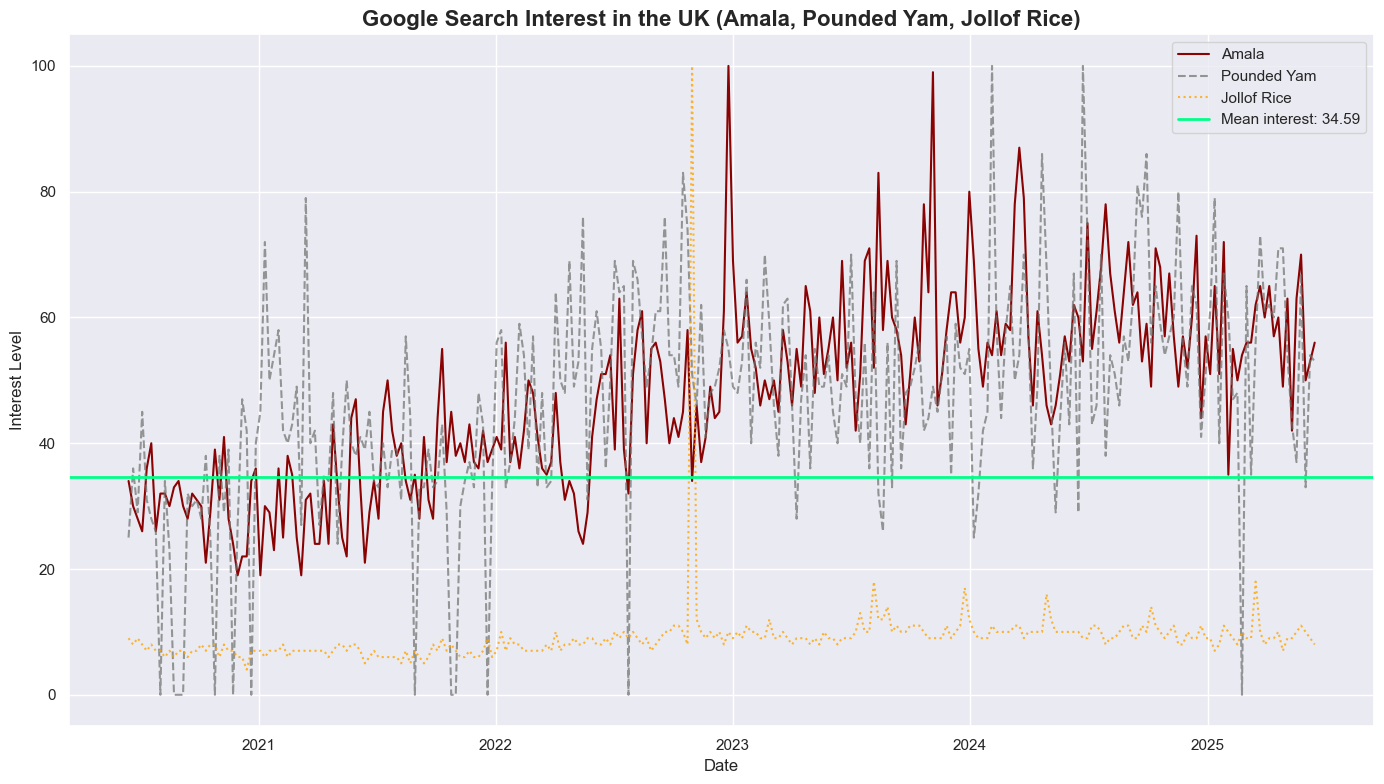

In [13]:

# Set up the figure
plt.figure(figsize=(14, 8))

# Ploting each dish with different line styles
sns.lineplot(data=df, x="date", y="Amala", label="Amala", color='#8A0303', linestyle='-')
sns.lineplot(data=df, x="date", y="Pounded yam", label="Pounded Yam", color='#6D706D' , linestyle='--',alpha=0.7)
sns.lineplot(data=df, x="date", y="jollof rice", label="Jollof Rice", color='#FFA500', linestyle=':',alpha=0.8)

# Calculating and plot combined mean line
combined_mean = df[['Amala', 'Pounded yam', 'jollof rice']].mean().mean()
plt.axhline(combined_mean,  color="#00FF88", linestyle='-', linewidth=2, label=f'Mean interest: {combined_mean:.2f}')

# Title and axis labels
plt.title("Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Interest Level")
plt.legend()
plt.tight_layout()
plt.show()



### 📊 Comparative Google Search Interest in the UK: Amala vs. Pounded Yam vs. Jollof Rice

This line chart compares the Google search interest trends for **three popular West African dishes**—**Amala**, **Pounded Yam**, and **Jollof Rice**—in the United Kingdom over the past five years.

- 🔴 **Amala** (red solid line) shows a **steady upward trend** with noticeable peaks, suggesting a growing and consistent interest, especially post-2022. Its search activity frequently rises above the group average.
- ⚫ **Pounded Yam** (grey dashed line) exhibits a **highly volatile pattern**, with interest fluctuating significantly. While it occasionally spikes above Amala, its inconsistency may indicate less sustained curiosity or fragmented audience engagement.
- 🟠 **Jollof Rice** (orange dotted line) has **consistently low search interest** compared to the other two dishes, despite its global popularity. This could imply that its trend status is stable but saturated.
- 🟩 The **green horizontal line** indicates the **average interest level across the trends**, estimated at **34.59**. Amala consistently remains above this benchmark in recent years.

📌 **Conclusion:**  
Among the three dishes, **Amala** demonstrates the most promising trend for sustained and increasing interest in the UK. This supports its strategic positioning for market entry or expansion by Nigerian food businesses like **Amala Hut**.




- ### KDE Plot of Search Interest
Kernel density plot of google search interest of amala, pounded yam and jollof rice

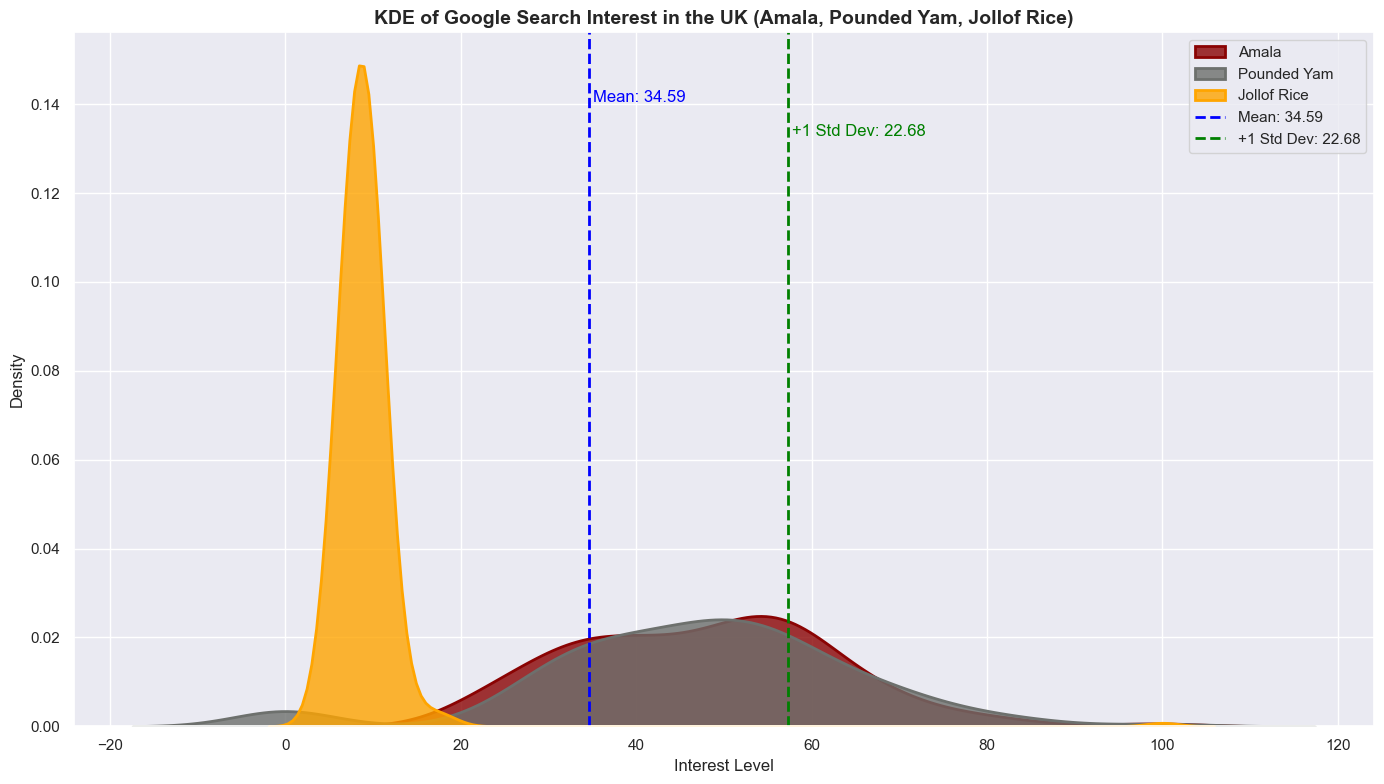

In [14]:

plt.figure(figsize=(14, 8))

# Define dishes and your custom colors
dishes = {
    'Amala': '#8A0303',          # Deep red
    'Pounded yam': '#6D706D',    # Grey (adjusted to visible color from #6D706D00)
    'jollof rice': '#FFA500'     # Orange
}

# Plot KDEs
for dish, color in dishes.items():
    sns.kdeplot(df[dish], shade=True, label=dish.title(), color=color, linewidth=2, alpha=0.8)

# Combine all dish values to compute global mean and std
combined_values = pd.concat([df[d] for d in dishes])
mean_value = combined_values.mean()
std_value = combined_values.std()

# Plot shared mean and +1 std deviation lines
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.text(mean_value + 0.5, plt.ylim()[1] * 0.9, f"Mean: {mean_value:.2f}", color='blue')

plt.axvline(mean_value + std_value, color='green', linestyle='--', linewidth=2, label=f'+1 Std Dev: {std_value:.2f}')
plt.text(mean_value + std_value + 0.5, plt.ylim()[1] * 0.85, f"+1 Std Dev: {std_value:.2f}", color='green')

# Final plot formatting
plt.title("KDE of Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)", fontsize=14, fontweight='bold')
plt.xlabel("Interest Level")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


### 📈 KDE of Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)

This KDE plot visualizes the distribution of Google Search interest levels for three popular African dishes over the last five years in the UK:

- 🔴 **Amala** and ⚫ **Pounded Yam** exhibit similar, broader distributions centered around moderate-to-high interest levels. Their curves are wide and slightly right-skewed, suggesting **varying but sustained search volumes** over time.
- 🟠 **Jollof Rice**, on the other hand, shows a sharp, narrow peak at a low interest level, indicating **consistently low and stable search activity**. This could reflect either saturation or lack of trend volatility.
- The **blue dashed line** represents the **overall mean interest level** of approximately **34.59**, which both Amala and Pounded Yam frequently exceed.
- The **green dashed line** marks **+1 standard deviation (22.68)** from the mean, highlighting the range of higher-than-average interest.

📌 **Insights:**
- **Amala** and **Pounded Yam** are more dynamic in terms of interest, suggesting better trend potential for cultural food ventures.
- **Jollof Rice**, despite being globally known, shows **less fluctuation**—possibly indicating lower potential for novelty-driven growth in search interest.

This distribution supports the hypothesis that **Amala**, due to its consistent and upward-moving interest levels, is a strong candidate for cultural culinary expansion (e.g., by *Amala Hut* in the UK).


**<h1><span style="color: BurlyWood;">4.O Trendiness Metrics</span></h2>**
calculating the velocity, Acceleration and volatility of the amala trend data

## 4.1 Velocity(rate of change)
Calculating the velocity of the amala trend

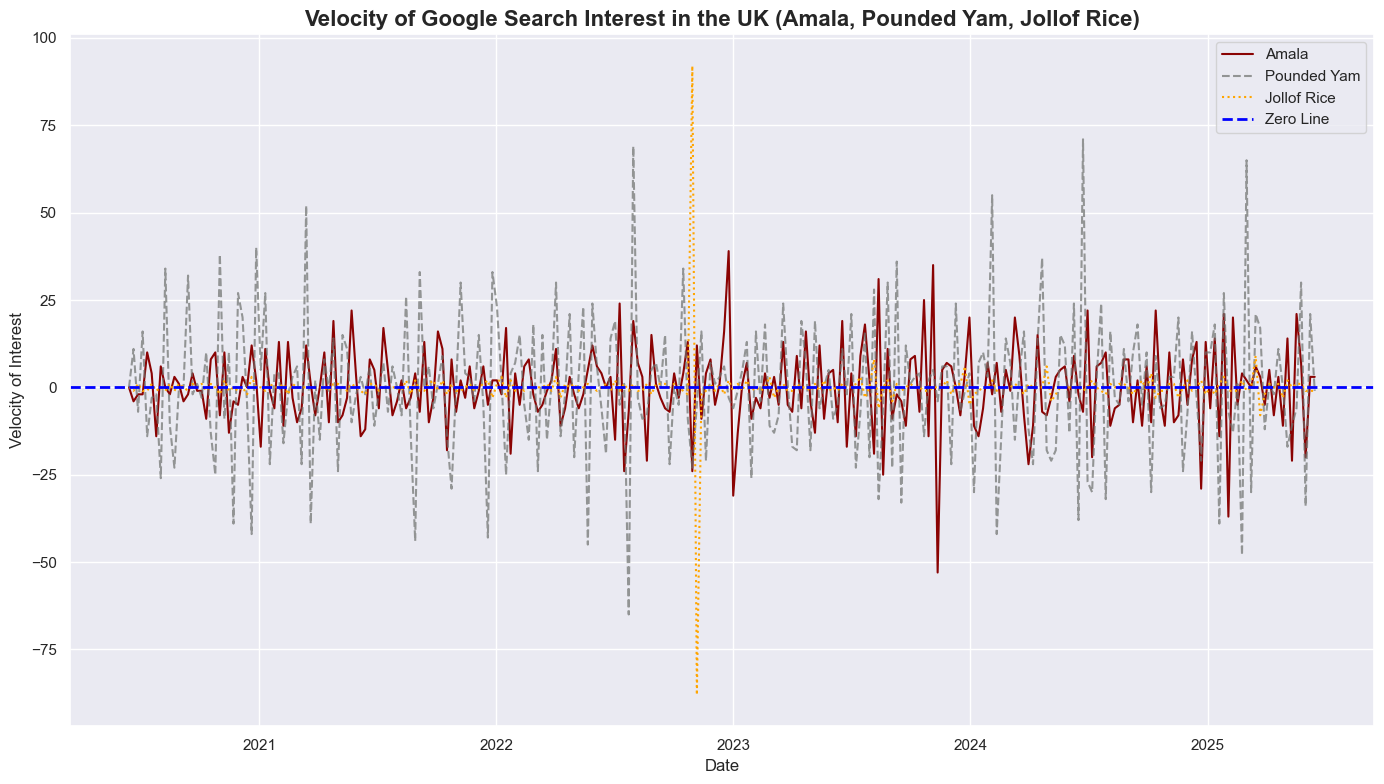

In [15]:
# Compute velocity for each dish
df['Amala_velocity'] = df['Amala'].diff().fillna(0)
df['Pounded_yam_velocity'] = df['Pounded yam'].diff().fillna(0)
df['Jollof_rice_velocity'] = df['jollof rice'].diff().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))

# Define consistent color and style mapping
sns.lineplot(data=df, x='date', y='Amala_velocity', label='Amala', color='#8A0303', linestyle='-')
sns.lineplot(data=df, x='date', y='Pounded_yam_velocity', label='Pounded Yam', color='#6D706D', linestyle='--', alpha=0.7)
sns.lineplot(data=df, x='date', y='Jollof_rice_velocity', label='Jollof Rice', color='#FFA500', linestyle=':')

# Zero reference line
plt.axhline(0, color='blue', linestyle='--', linewidth=2, label='Zero Line')

# Titles and axis
plt.title("Velocity of Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Velocity of Interest")
plt.legend()
plt.tight_layout()
plt.show()



### 🔄 Velocity of Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)

This plot represents the **rate of change (velocity)** of Google Search interest over time for three popular African dishes in the UK:

- **Amala** (maroon line) shows frequent and sharp fluctuations in velocity, indicating **volatile but dynamic interest**, with both sudden spikes and dips over the years.
- **Pounded Yam** (grey dashed line) also displays **large swings**, suggesting that search interest for this dish can be quite sporadic.
- **Jollof Rice** (orange dotted line) has much **lower and smoother velocity**, reinforcing its **stable and consistent** search trend compared to the others.

The **blue dashed horizontal line** marks the **zero velocity** level, which helps distinguish between increasing and decreasing interest:
- Points **above** the line indicate **rising interest** in the respective period.
- Points **below** the line indicate **declining interest**.

📌 **Key Takeaways:**
- **Amala** shows bursts of upward and downward momentum, which could reflect campaign effects, seasonal trends, or cultural events.
- **Jollof Rice's** stability suggests an established presence with little trend-driven behavior.
- The **volatility of Pounded Yam and Amala** may signal trend adoption opportunities if harnessed with the right timing and marketing strategies.

This analysis helps identify how quickly public attention is shifting, which is critical for businesses like *Amala Hut* considering UK market timing and promotional strategies.


## 4.2 Acceleration(change of rate)
Calculating the acceleration of the amala trend

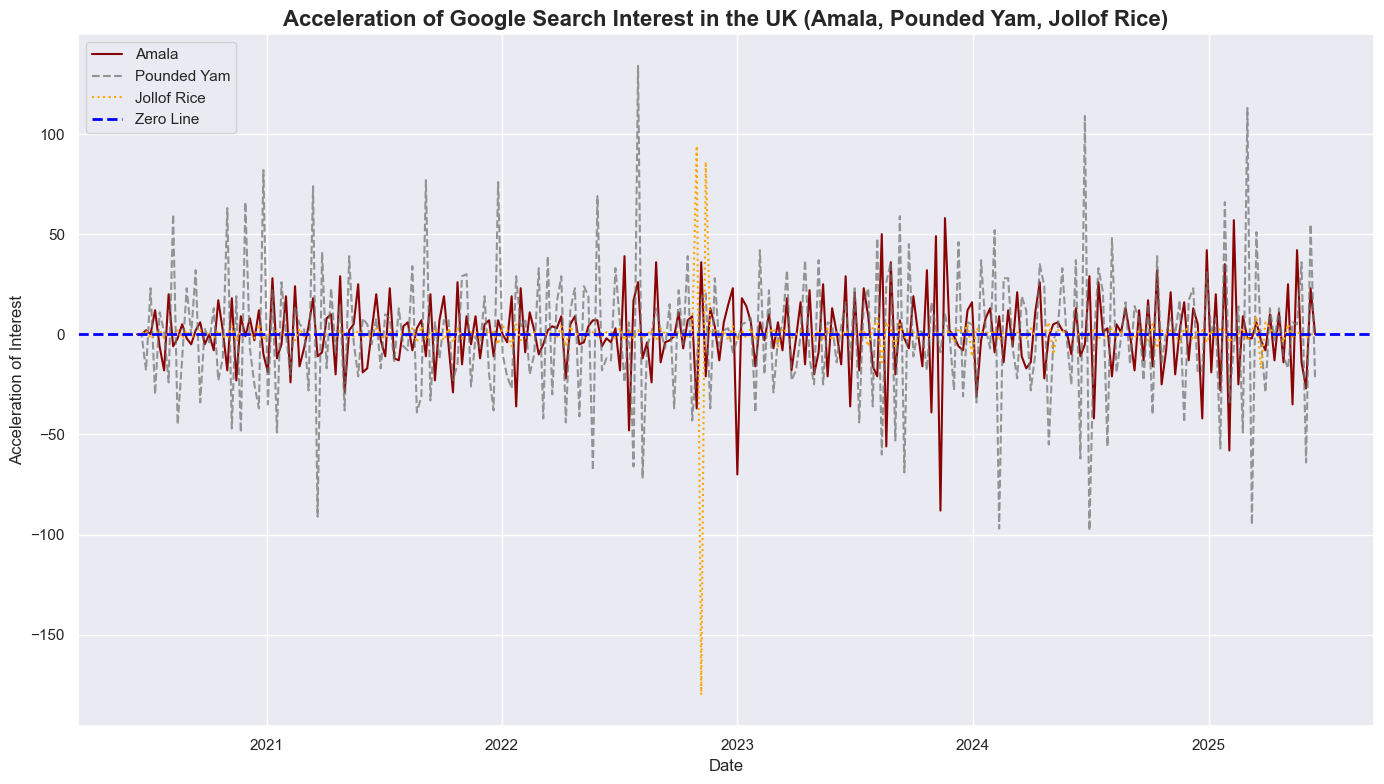

In [16]:
# Compute acceleration for each dish (second derivative)
df['Amala_acceleration'] = df['Amala'].diff().diff().fillna(0)
df['Pounded_yam_acceleration'] = df['Pounded yam'].diff().diff().fillna(0)
df['Jollof_rice_acceleration'] = df['jollof rice'].diff().diff().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='date', y='Amala_acceleration', label='Amala', color='#8A0303', linestyle='-')
sns.lineplot(data=df, x='date', y='Pounded_yam_acceleration', label='Pounded Yam', color='#6D706D', linestyle='--', alpha=0.7)
sns.lineplot(data=df, x='date', y='Jollof_rice_acceleration', label='Jollof Rice', color='#FFA500', linestyle=':')

# Zero reference line
plt.axhline(0, color='blue', linestyle='--', linewidth=2, label='Zero Line')

# Plot aesthetics
plt.title("Acceleration of Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Acceleration of Interest")
plt.legend()
plt.tight_layout()
plt.show()



## 4.3 Volatility (rolling std deviation)
Calculating the volatility of the amala trend

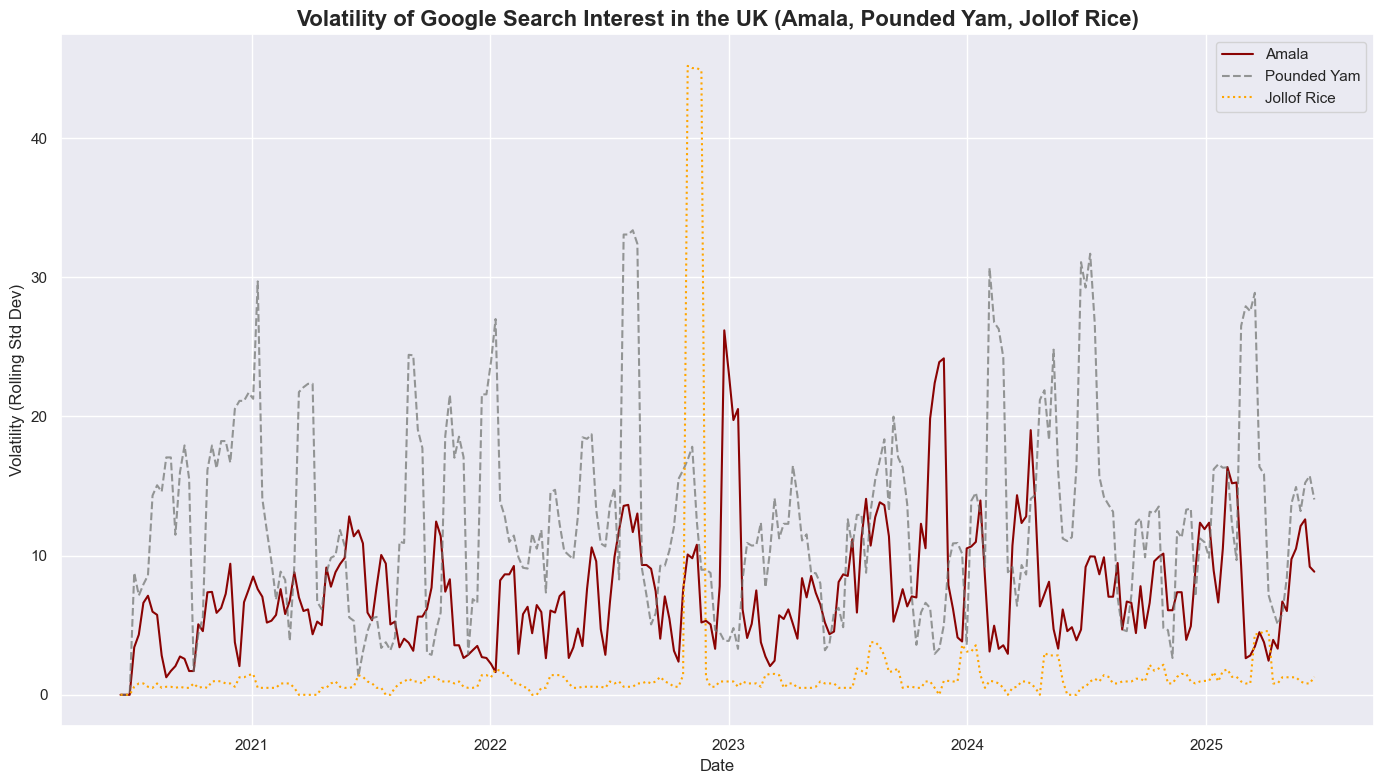

In [17]:

# Compute rolling standard deviation (volatility) for each dish
df['Amala_volatility'] = df['Amala'].rolling(window=4).std().fillna(0)
df['Pounded_yam_volatility'] = df['Pounded yam'].rolling(window=4).std().fillna(0)
df['Jollof_rice_volatility'] = df['jollof rice'].rolling(window=4).std().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='date', y='Amala_volatility', label='Amala', color='#8A0303', linestyle='-')
sns.lineplot(data=df, x='date', y='Pounded_yam_volatility', label='Pounded Yam', color='#6D706D', linestyle='--', alpha=0.7)
sns.lineplot(data=df, x='date', y='Jollof_rice_volatility', label='Jollof Rice', color='#FFA500', linestyle=':')

# Title and formatting
plt.title("Volatility of Google Search Interest in the UK (Amala, Pounded Yam, Jollof Rice)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std Dev)")
plt.legend()
plt.tight_layout()
plt.show()


## 4.3 Trendiness Score
Calculating the trendiness score

In [20]:
# Step 1: Standardize all column names
df.columns = df.columns.str.replace(' ', '_')

# Step 2: Set up dish list (now all with underscores)
dishes = ['Amala', 'Pounded_yam', 'Jollof_rice']

for dish in dishes:
    velocity_col = f"{dish}_velocity"
    acceleration_col = f"{dish}_acceleration"
    volatility_col = f"{dish}_volatility"

    features = df[[velocity_col, acceleration_col, volatility_col]].copy()
    features.columns = ['v', 'a', 'vol']  # standard naming
    normed = scaler.fit_transform(features)

    # Calculate trendiness score and store
    df[f"{dish}_trendiness"] = 0.4 * normed[:, 0] + 0.4 * normed[:, 1] + 0.2 * (1 - normed[:, 2])
df[['date','Amala_trendiness',	'Pounded_yam_trendiness','Jollof_rice_trendiness']]

,date,Amala_trendiness,Pounded_yam_trendiness,Jollof_rice_trendiness
0,2020-06-14,0.671531,0.560142,0.658329
1,2020-06-21,0.654139,0.592495,0.656107
2,2020-06-28,0.668314,0.508519,0.663471
3,2020-07-05,0.636747,0.594303,0.650632
4,2020-07-12,0.714886,0.424483,0.652493
...,...,...,...,...
257,2025-05-18,0.797706,0.461649,0.656442
258,2025-05-25,0.571005,0.631347,0.656314
259,2025-06-01,0.414317,0.258526,0.649573
260,2025-06-08,0.677308,0.622448,0.652493


- ### line Plot of Trendiness
Line plot of trediness scores of amala, pounded yam and jollof rice

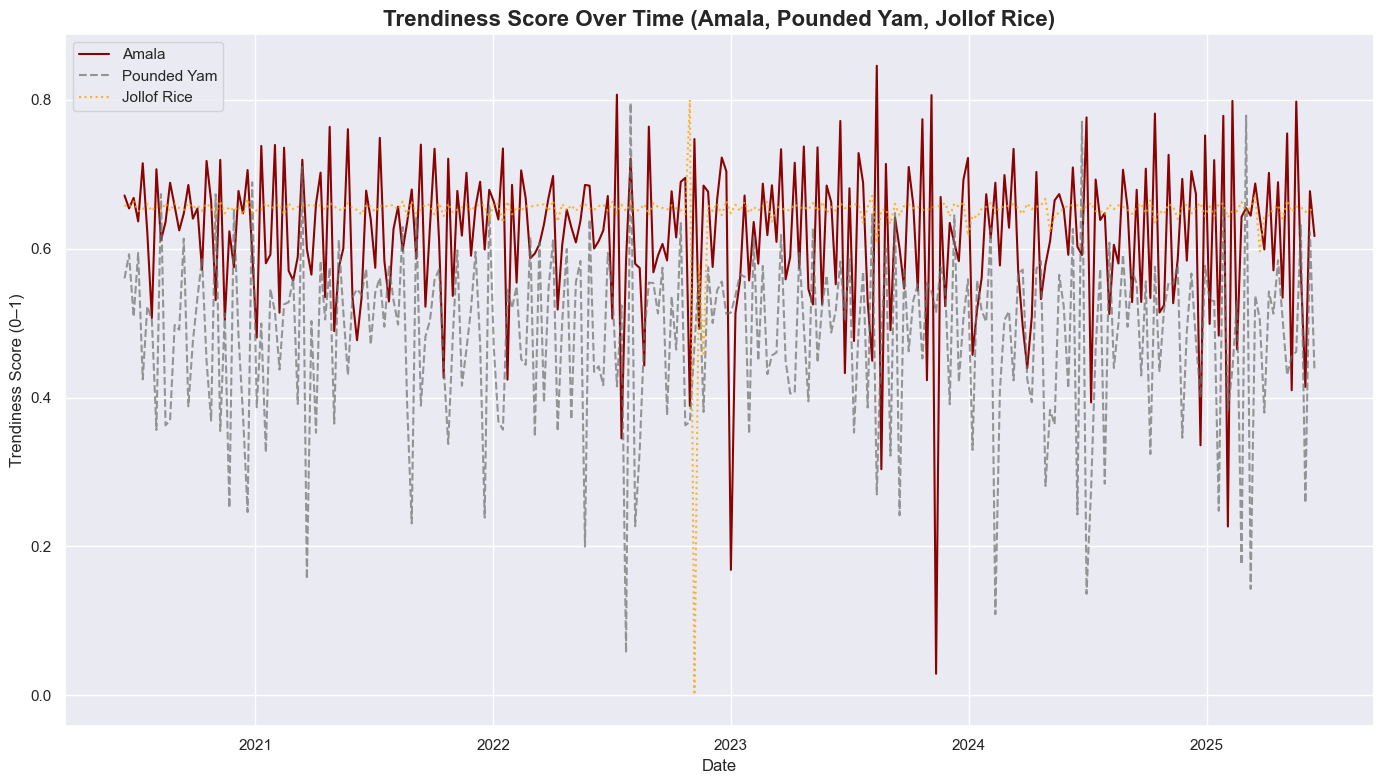

In [21]:

# Normalize and compute trendiness score
scaler = MinMaxScaler()


# Plot the trendiness scores
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='date', y='Amala_trendiness', label='Amala', color='#8A0303', linestyle='-')
sns.lineplot(data=df, x='date', y='Pounded_yam_trendiness', label='Pounded Yam', color='#6D706D', linestyle='--', alpha=0.7)
sns.lineplot(data=df, x='date', y='Jollof_rice_trendiness', label='Jollof Rice', color='#FFA500', linestyle=':', alpha=0.8)

plt.title("Trendiness Score Over Time (Amala, Pounded Yam, Jollof Rice)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Trendiness Score (0–1)")
plt.legend()
plt.tight_layout()
plt.show()


- ### KDE Plot of Trendiness
Kernel density plot of trediness scores of amala, pounded yam and jollof rice

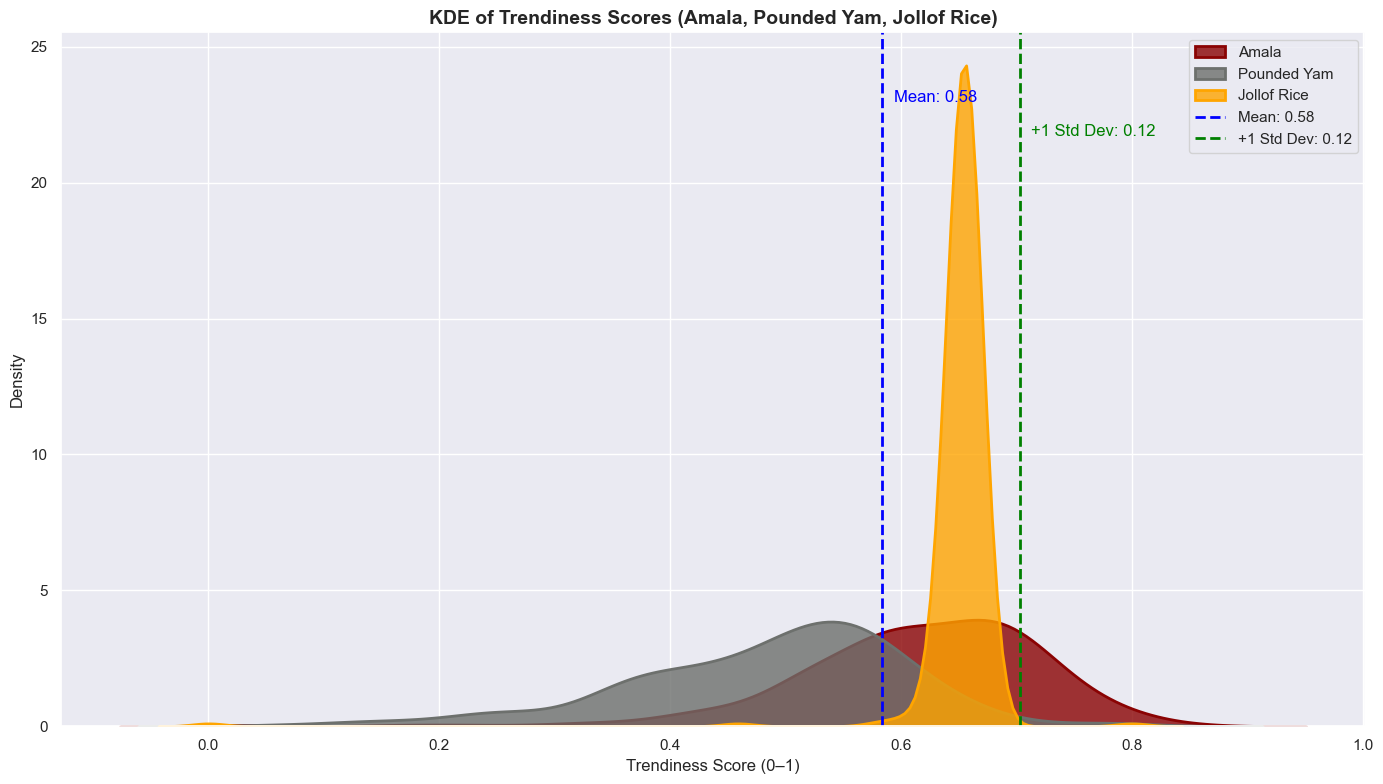

In [22]:
# Plotting KDEs for trendiness scores of each dish

plt.figure(figsize=(14, 8))

# Define trendiness columns and custom colors
trendiness_dishes = {
    'Amala_trendiness': '#8A0303',           # Deep red
    'Pounded_yam_trendiness': '#6D706D',     # Grey
    'Jollof_rice_trendiness': '#FFA500'      # Orange
}

# Plot KDEs for each dish's trendiness
for trend_col, color in trendiness_dishes.items():
    label = trend_col.replace('_trendiness', '').replace('_', ' ').title()
    sns.kdeplot(df[trend_col], shade=True, label=label, color=color, linewidth=2, alpha=0.8)

# Combine all trendiness values to compute shared mean and std
combined_trendiness = pd.concat([df[col] for col in trendiness_dishes])
mean_value = combined_trendiness.mean()
std_value = combined_trendiness.std()

# Plot global mean and +1 std deviation
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.text(mean_value + 0.01, plt.ylim()[1] * 0.9, f"Mean: {mean_value:.2f}", color='blue')

plt.axvline(mean_value + std_value, color='green', linestyle='--', linewidth=2, label=f'+1 Std Dev: {std_value:.2f}')
plt.text(mean_value + std_value + 0.01, plt.ylim()[1] * 0.85, f"+1 Std Dev: {std_value:.2f}", color='green')

# Final plot formatting
plt.title("KDE of Trendiness Scores (Amala, Pounded Yam, Jollof Rice)", fontsize=14, fontweight='bold')
plt.xlabel("Trendiness Score (0–1)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


- ### Average Trediness over time
Calculating the average trediness over a 5 year and 6 months period

In [23]:
# Calculate average trendiness over the last 5 years and last 6 months

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define dishes and corresponding trendiness column names
dishes = {
    'Amala': 'Amala_trendiness',
    'Pounded Yam': 'Pounded_yam_trendiness',
    'Jollof Rice': 'Jollof_rice_trendiness'
}

# Filter for the last 6 months
six_months_ago = df['date'].max() - pd.DateOffset(months=6)
df_last_6_months = df[df['date'] >= six_months_ago]

# Prepare result container
results = []

for display_name, col in dishes.items():
    avg_5yr = df[col].mean()
    avg_6mo = df_last_6_months[col].mean()
    results.append({
        'Dish': display_name,
        'Avg Trendiness (5 Years)': round(avg_5yr, 3),
        'Avg Trendiness (6 Months)': round(avg_6mo, 3)
    })

# Create DataFrame
trendiness_summary_df = pd.DataFrame(results)

# Display
trendiness_summary_df


,Dish,Avg Trendiness (5 Years),Avg Trendiness (6 Months)
0,Amala,0.615,0.605
1,Pounded Yam,0.485,0.471
2,Jollof Rice,0.651,0.651


## 🧠 Interpretation of Trendiness Scores

### ✅ Jollof Rice
- Has the **highest average trendiness** in both long-term (5 years) and short-term (6 months).
- Shows **stability**, with the exact same score in both periods.
- This suggests Jollof Rice is a **consistently popular dish**, and likely to be a safe bet for inclusion in a menu.

---

### ✅ Amala
- Shows a **slight decrease** in trendiness in the last 6 months.
- Despite this, it remains **relatively strong and stable**.
- Could be a viable candidate for adoption, especially in areas with existing demand or cultural relevance.

---

### ⚠️ Pounded Yam
- Has the **lowest trendiness score overall**.
- Also experienced a **minor decline** in the last 6 months.
- May not be a strong trend at the moment; adoption should be supported by **other factors** such as:
  - Profit margins
  - Ingredient availability
  - Culture


**<h1><span style="color: BurlyWood;">4.O Business Recommendation</span></h2>**
Business Recommendation Based on Trendiness Scores


Based on the analysis of trendiness scores across a 5-year historical period and the most recent 6-month window, the following recommendations are made regarding the adoption or prioritization of each dish:

### ✅ Jollof Rice – *High-Priority Adoption*
- Jollof Rice demonstrates strong and consistent trendiness in both the long term and short term.
- Despite having the **lowest overall Google search interest**, it shows the **highest trendiness score**.
- This indicates that Jollof Rice is gaining traction quickly and steadily.
- It is an excellent candidate for businesses looking to adopt or expand their menu with a dish that is **on the rise**, **stable**, and **likely to perform well** with appropriate promotion.

> **Recommendation**: Adopt and prioritize in marketing campaigns or pilot menus. Jollof Rice represents a strategic opportunity for early movers.

---

### ✅ Amala – *Viable for Targeted Adoption*
- Amala shows a **slight decline** in trendiness over the last 6 months, yet remains relatively strong overall.
- It is likely a **mature trend** — popular in established communities but currently stable rather than growing.
- This makes Amala a **safe, culturally relevant option**, particularly in areas with a strong Nigerian or West African presence.

> **Recommendation**: Adopt where cultural alignment exists. Consider positioning as a traditional or classic menu item.

---

### ⚠️ Pounded Yam – *Low-Priority Adoption*
- Pounded Yam has the **lowest trendiness score overall** and has shown **limited recent momentum**.
- While it may offer cultural or niche appeal, it does not currently signal enough market activity to justify widespread menu placement.

> **Recommendation**: Defer adoption unless supported by offline demand, high profit margins, or low operational complexity.

---

### 📌 Summary Table

| Dish          | Avg Trendiness (5 Years) | Avg Trendiness (6 Months) | Recommended Action         |
|---------------|---------------------------|-----------------------------|------------------------------|
| **Jollof Rice**   | 0.651                     | 0.651                       | ✅ Adopt & Prioritize         |
| **Amala**         | 0.615                     | 0.605                       | ✅ Adopt (Targeted Strategy)  |
| **Pounded Yam**   | 0.485                     | 0.471                       | ⚠️ Defer / Niche Opportunity  |



**Creating Mock features**

In [30]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Add business-relevant mock features
df['avg_ingredient_cost'] = np.random.uniform(20, 35, size=len(df))  # average cost of ingredients
df['local_demand_index'] = np.random.uniform(0.5, 1.0, size=len(df))  # local market demand score
df['storage_cost_index'] = np.random.uniform(0.2, 0.8, size=len(df))  # normalized storage cost index
df['scalability_score'] = np.random.choice([0.3, 0.5, 0.7, 0.9], size=len(df))  # ease of scaling production
df['supplier_stability_index'] = np.random.uniform(0.4, 1.0, size=len(df))  # reliability of suppliers
df['is_festival_week'] = np.random.choice([0, 1], size=len(df))  # binary feature: festival or not
df['repeat_customer_rate'] = np.random.uniform(0.2, 0.6, size=len(df))  # customer retention estimate
df['marketing_mentions'] = np.random.randint(5, 30, size=len(df))  # social media or campaign exposure

# Optional: Preview the final DataFrame
df[['date', 'Amala_trendiness', 'avg_ingredient_cost', 'local_demand_index',
    'storage_cost_index', 'scalability_score', 'supplier_stability_index',
    'is_festival_week', 'repeat_customer_rate', 'marketing_mentions']].head()

,date,Amala_trendiness,avg_ingredient_cost,local_demand_index,storage_cost_index,scalability_score,supplier_stability_index,is_festival_week,repeat_customer_rate,marketing_mentions
0,2020-06-14,0.671531,25.618102,0.570042,0.702997,0.5,0.969072,1,0.232046,7
1,2020-06-21,0.654139,34.260715,0.759165,0.481216,0.5,0.858163,0,0.557927,16
2,2020-06-28,0.668314,30.979909,0.938687,0.448892,0.9,0.484068,1,0.419037,6
3,2020-07-05,0.636747,28.979877,0.870384,0.364044,0.7,0.921081,1,0.526919,5
4,2020-07-12,0.714886,22.340280,0.848508,0.233825,0.7,0.692459,0,0.380927,27


**Model Building**

In [31]:
def business_rule(row):
    if row['Amala_trendiness'] > 0.7 and row['local_demand_index'] > 0.7 and row['scalability_score'] > 0.7:
        return "Scale Up"
    elif row['Amala_trendiness'] > 0.4:
        return "Maintain"
    else:
        return "Phase Out"

df['Amala_decision'] = df.apply(business_rule, axis=1)

In [32]:
df

,date,Amala,jollof_rice,Pounded_yam,Amala_velocity,Pounded_yam_velocity,Jollof_rice_velocity,Amala_acceleration,Pounded_yam_acceleration,Jollof_rice_acceleration,Amala_volatility,Pounded_yam_volatility,Jollof_rice_volatility,Amala_trendiness,Pounded_yam_trendiness,Jollof_rice_trendiness,avg_ingredient_cost,local_demand_index,storage_cost_index,scalability_score,supplier_stability_index,is_festival_week,repeat_customer_rate,marketing_mentions,Amala_decision
0,2020-06-14,34,9,25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.671531,0.560142,0.658329,25.618102,0.570042,0.702997,0.5,0.969072,1,0.232046,7,Maintain
1,2020-06-21,30,8,36,-4.0,11.0,-1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.654139,0.592495,0.656107,34.260715,0.759165,0.481216,0.5,0.858163,0,0.557927,16,Maintain
2,2020-06-28,28,9,29,-2.0,-7.0,1.0,2.0,-18.0,2.0,0.000000,0.000000,0.000000,0.668314,0.508519,0.663471,30.979909,0.938687,0.448892,0.9,0.484068,1,0.419037,6,Maintain
3,2020-07-05,26,8,45,-2.0,16.0,-1.0,0.0,23.0,-2.0,3.415650,8.770215,0.577350,0.636747,0.594303,0.650632,28.979877,0.870384,0.364044,0.7,0.921081,1,0.526919,5,Maintain
4,2020-07-12,36,7,31,10.0,-14.0,-1.0,12.0,-30.0,0.0,4.320494,7.135592,0.816497,0.714886,0.424483,0.652493,22.340280,0.848508,0.233825,0.7,0.692459,0,0.380927,27,Maintain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2025-05-18,63,10,37,21.0,-6.0,1.0,42.0,5.0,1.0,10.500000,14.930394,1.258306,0.797706,0.461649,0.656442,30.440447,0.575208,0.525635,0.3,0.780403,1,0.238214,24,Maintain
258,2025-05-25,70,11,67,7.0,30.0,1.0,-14.0,36.0,0.0,12.124356,13.200379,0.957427,0.571005,0.631347,0.656314,28.550918,0.797065,0.351079,0.5,0.723991,1,0.449544,24,Maintain
259,2025-06-01,50,10,33,-20.0,-34.0,-1.0,-27.0,-64.0,-2.0,12.606215,15.231546,0.816497,0.414317,0.258526,0.649573,21.457647,0.690445,0.407418,0.3,0.867907,0,0.380707,8,Maintain
260,2025-06-08,53,9,54,3.0,21.0,-1.0,23.0,55.0,0.0,9.201449,15.734781,0.816497,0.677308,0.622448,0.652493,29.225108,0.984957,0.308959,0.9,0.464188,0,0.434643,10,Maintain


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report

In [36]:
feature_cols = [
    'Amala_trendiness', 'avg_ingredient_cost', 'local_demand_index',
    'storage_cost_index', 'scalability_score', 'supplier_stability_index',
    'is_festival_week', 'repeat_customer_rate', 'marketing_mentions'
]
X = df[feature_cols]
y = df['Amala_decision']  # Categories: "Scale Up", "Maintain", "Phase Out"

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(
    C=np.float64(8.334426408004218),
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    random_state=0
)

# Create pipeline with scaler + model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', log_reg)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Maintain       0.98      0.98      0.98        50
   Phase Out       1.00      1.00      1.00         2
    Scale Up       0.00      0.00      0.00         1

    accuracy                           0.96        53
   macro avg       0.66      0.66      0.66        53
weighted avg       0.96      0.96      0.96        53

